In [49]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

Zamierzasz kupić mieszkanie. Upatrzone M kosztuje w tym momencie 120 tys. zł, jednak przewidujesz, że przez następne 5 lat ceny mieszkań będą rosły w tempie 5% rocznie. W tym momencie nie dysponujesz wystarczającymi środkami, dlatego znajdujesz ofertę banku, który proponuje lokatę, do której dopłacasz pewna stałą kwotę na koniec każdego miesiąca. Bank oferuje nominalną stopę procentową w wysokości 12% w skali roku, przy kapitalizacji miesięcznej.

- Ile będzie wynosiła orientacyjna cena mieszkania za 5 lat?
- Ile musisz wpłacać do banku każdego miesiąca, aby przy przedstawionej ofercie uzbierać na mieszkanie w ciągu 5 lat?
- Stwórz wykres przedstawiający, jak w interwałach miesięcznych zmieniać się będzie cena mieszkania (liniowy wzrost w całym okresie) oraz wartość twojej lokaty.

Cena mieszkania (przy założeniu, że koszt rośnie 5% rocznie, ale w systemie ciągłym, tzn. cena aktualizowana jest co miesiąc)

In [50]:
cost_initial = 12e04
cost_annual_rate = 5e-02
cost_month_rate = cost_annual_rate/12
number_of_years = 5
number_of_periods = number_of_years*12

Przy comiesięcznej zmianie wartości końcowa cena mieszkania wyniesie:

In [51]:
cost_final = np.around(cost_initial*(1+cost_month_rate)**number_of_periods,2)
cost_final

154003.04

Przy coroczniej zmianie wartości końcowa cena mieszkania wyniesie:

In [52]:
cost_final_y = np.around(cost_initial*(1+cost_annual_rate)**number_of_years,2)
cost_final_y


153153.79

Z równania:

$$ futurevalue = pv\cdot(1+rate)^{nper}+pmt\cdot(1+rate \cdot when)/rate*((1+rate)^{nper}-1) $$

można obliczyć payment (pmt)

Ponieważ pv = pmt, można zapisać:
$$f_v = p_v \cdot \left(1+r\right)^{n_{per}} + p_{mt} \cdot \left(1+r\cdot w\right)/r \cdot \left((1+r)^{n_{per}}-1\right). $$
Po przekształceniu:
$$f_v = p_v \left[\left(1+r\right)^{n_{per}} + \left(1+r\cdot w\right)/r \cdot \left((1+r)^{n_{per}}-1\right)\right]. $$
Możemy obliczyć:
$$p_v =  \dfrac{f_v}{\left[\left(1+r\right)^{n_{per}} + \left(1+r\cdot w\right)/r \cdot \left((1+r)^{n_{per}}-1\right)\right]}. $$




In [53]:
when = 1

In [54]:
future_value = cost_final
rate = 12e-02/12
pv = np.around(future_value/((1+rate)**number_of_periods+(1+rate*when)/rate*((1+rate)**number_of_periods-1)),2)
pv

1826.78

Sprawdźmy, czy z funkcji numpy_financial.fv otrzymamy ten sam wynik

In [55]:
fv = np.around(npf.fv(rate, number_of_periods, -pv, -pv, when),2)
fv

154003.15

Sprawdzimy też, czy funkcja wbudowana present value da ten sam wynik:

In [56]:
pv = np.around(npf.pv(rate, number_of_periods, pv, -fv, when),2)
pv

1826.78

Jest to oczekiwany wynik.

Przeprowadźmy symulację, gdzie
$t$ - wektor (czas w miesiącach)

In [57]:
t = np.arange(number_of_periods)+1
t

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])

Cena mieszkania na koniec każdego z miesięcy

In [58]:
flat_cost = np.around(cost_initial*(1+cost_month_rate)**t,2)
flat_cost

array([120500.  , 121002.08, 121506.26, 122012.53, 122520.92, 123031.42,
       123544.06, 124058.82, 124575.73, 125094.8 , 125616.03, 126139.43,
       126665.01, 127192.78, 127722.75, 128254.93, 128789.32, 129325.95,
       129864.8 , 130405.91, 130949.26, 131494.89, 132042.78, 132592.96,
       133145.43, 133700.2 , 134257.29, 134816.69, 135378.43, 135942.51,
       136508.93, 137077.72, 137648.88, 138222.41, 138798.34, 139376.67,
       139957.4 , 140540.56, 141126.15, 141714.17, 142304.65, 142897.58,
       143492.99, 144090.88, 144691.26, 145294.14, 145899.53, 146507.44,
       147117.89, 147730.88, 148346.43, 148964.54, 149585.22, 150208.49,
       150834.36, 151462.84, 152093.93, 152727.66, 153364.02, 154003.04])

Suma oszczędności na koniec kadego z miesięcy

In [59]:
savings = np.around(npf.fv(rate, t, -pv, -pv, when),2)
savings

array([  3690.1 ,   5572.04,   7472.81,   9392.59,  11331.56,  13289.93,
        15267.87,  17265.6 ,  19283.3 ,  21321.18,  23379.44,  25458.29,
        27557.92,  29678.54,  31820.38,  33983.63,  36168.51,  38375.25,
        40604.05,  42855.13,  45128.73,  47425.07,  49744.37,  52086.86,
        54452.77,  56842.35,  59255.82,  61693.43,  64155.41,  66642.01,
        69153.48,  71690.06,  74252.01,  76839.58,  79453.02,  82092.6 ,
        84758.57,  87451.21,  90170.77,  92917.52,  95691.75,  98493.71,
       101323.7 , 104181.98, 107068.85, 109984.58, 112929.48, 115903.82,
       118907.91, 121942.03, 125006.5 , 128101.61, 131227.68, 134385.  ,
       137573.9 , 140794.69, 144047.68, 147333.21, 150651.59, 154003.15])

Wykres ceny mieszkania i sumy oszczędności w czasie:

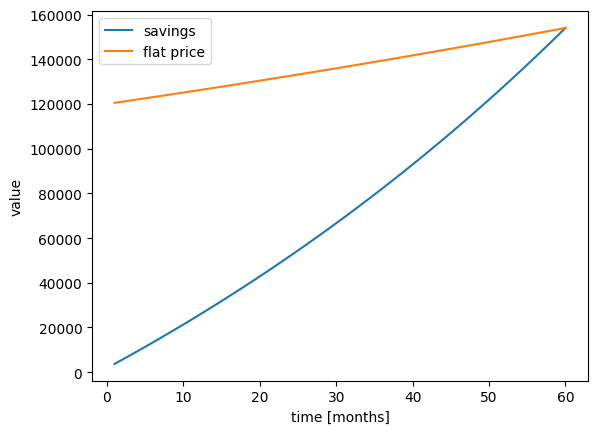

In [60]:
plt.plot(t, savings, label = 'savings')
plt.plot(t, flat_cost, label = 'flat price')
plt.xlabel('time [months]')
plt.ylabel('value')
plt.legend()
plt.show()

Wniosek: 
Z analizy wynika, że aby w tych warunkach zaoszczędzić na mieszkanie na lokacie, należałoby przez pięć lat comiesięcznie odkładać 1826.78 zł.